## Classification

In [1]:
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import os # permet d'accéder au répertoire et fichier du SE

In [2]:
# Chemin d'accès au répertoire courant
rep=os.getcwd()
print(rep)

C:\Users\HP\workfiles_IA\Animals Faces


In [3]:
#lister les éléments du répertoire courant
os.listdir(rep)

['.ipynb_checkpoints',
 'BearHead',
 'CatHead',
 'Cours.ipynb',
 'CowHead',
 'DeerHead']

In [4]:
#Lecture image bearhead
BearHead=[]

In [5]:
#creation du chemin d'accès au répertoire contenant les image Bearhead
way1=os.path.join(rep,os.listdir(rep)[1])
print(way1)

C:\Users\HP\workfiles_IA\Animals Faces\BearHead


In [6]:
for file in os.listdir(way1):
    image=imread(os.path.join(way1,file),as_gray=True)
    image=resize(image,(128,64))
    BearHead.append(image)

In [7]:
CatHead=[]

way2=os.path.join(rep,os.listdir(rep)[2])
for file in os.listdir(way2):
    image=imread(os.path.join(way2,file),as_gray=True)
    image=resize(image,(128,64))
    CatHead.append(image)


In [8]:
CowHead=[]
way3=os.path.join(rep,os.listdir(rep)[4])
for file in os.listdir(way3):
    image=imread(os.path.join(way3,file),as_gray=True)
    image=resize(image,(128,64))
    CowHead.append(image)


In [9]:
DeerHead=[]
way4=os.path.join(rep,os.listdir(rep)[-1])
for file in os.listdir(way4):
    image=imread(os.path.join(way4,file),as_gray=True)
    image=resize(image,(128,64))
    DeerHead.append(image)

## 2- Taille des échantillons 

In [10]:
print("BearHead:", len(BearHead))
print("CatHead:",len(CatHead))
print("CowHead:", len(CowHead))
print("DeerHead:",len(DeerHead))

BearHead: 101
CatHead: 160
CowHead: 104
DeerHead: 103


## 3- Visualisation de quelques images sélectionnées aléatoirement

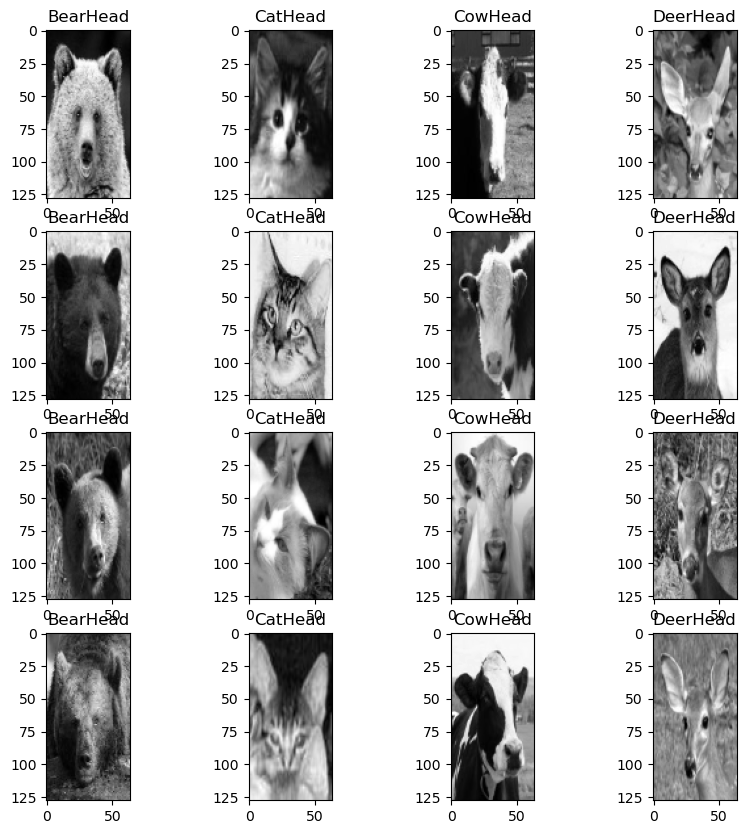

In [11]:
import random
f,axes=plt.subplots(4,4,figsize=(10,10))
for index in range(0,4):
    #BearHead
    picture=random.choice(BearHead)
    axes[index,0].imshow(picture,cmap='gray')
    axes[index,0].set_title('BearHead')
    #CatHead
    picture=random.choice(CatHead)
    axes[index,1].imshow(picture,cmap='gray')
    axes[index,1].set_title('CatHead')
    #CowHead
    picture=random.choice(CowHead)
    axes[index,2].imshow(picture,cmap='gray')
    axes[index,2].set_title('CowHead')
    #DeerHead
    picture=random.choice(DeerHead)
    axes[index,3].imshow(picture,cmap='gray')
    axes[index,3].set_title('DeerHead')

C:\Users\HP\AppData\Local\Temp\ipykernel_13092\3910144054.py:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_datas, hog_image=hog(image,orientations=8,pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)


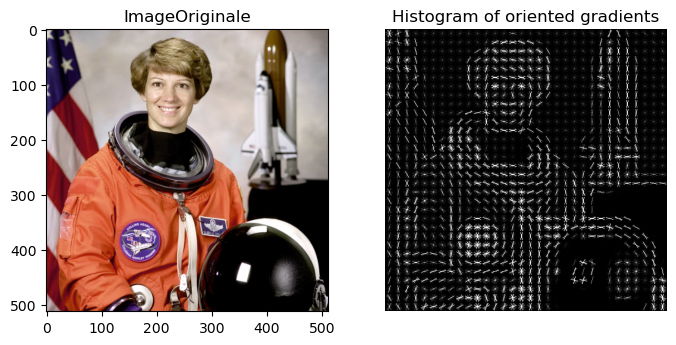

In [12]:
from skimage.feature import hog
from skimage import data, exposure
image=data.astronaut()
hog_datas, hog_image=hog(image,orientations=8,pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4))
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('ImageOriginale')

#Redimensionnement pour un meilleur affichage
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of oriented gradients')

plt.show()

   ## 4- Visualistion du hog pour quelques image 

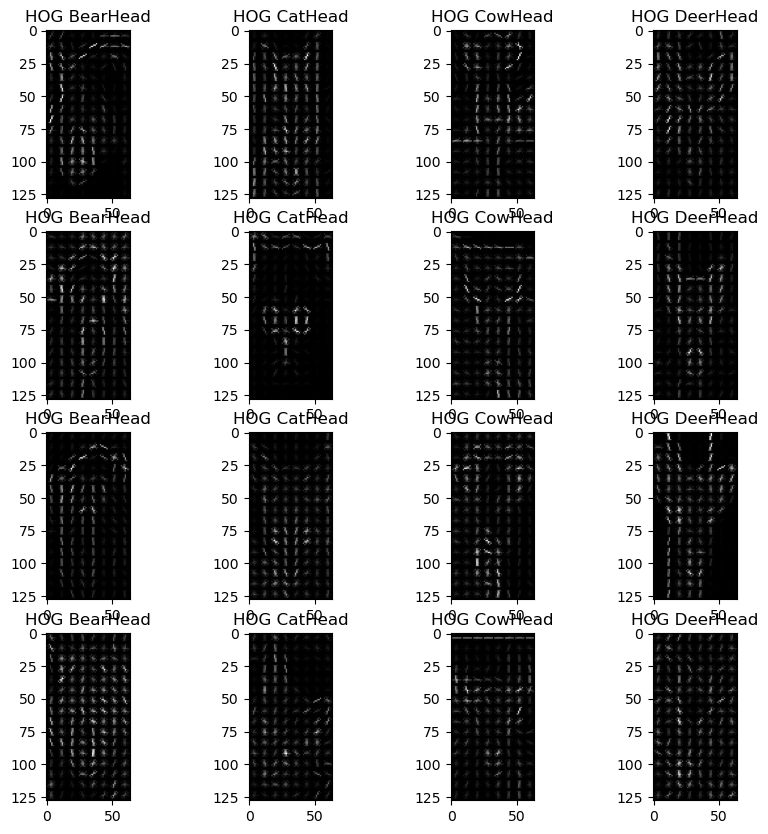

In [13]:
import random
from skimage.feature import hog
f,axes=plt.subplots(4,4,figsize=(10,10))
for index in range(0,4):
    #BearHead
    picture=random.choice(BearHead)
    #Calcul du hog
    hot_feature,hog_image=hog(picture,pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True, block_norm='L2-Hys')
    # Visualisation
    axes[index,0].imshow(hog_image,cmap='gray')
    axes[index,0].set_title('HOG BearHead')
    
     #CatHead
    picture=random.choice(CatHead)
    #Calcul du hog
    hot_feature,hog_image=hog(picture,pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True, block_norm='L2-Hys')
    # Visualisation
    axes[index,1].imshow(hog_image,cmap='gray')
    axes[index,1].set_title('HOG CatHead')
    
     #CowHead
    picture=random.choice(CowHead)
    #Calcul du hog
    hot_feature,hog_image=hog(picture,pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True, block_norm='L2-Hys')
    # Visualisation
    axes[index,2].imshow(hog_image,cmap='gray')
    axes[index,2].set_title('HOG CowHead')
    
     #DeerHead
    picture=random.choice(DeerHead)
    #Calcul du hog
    hot_feature,hog_image=hog(picture,pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True, block_norm='L2-Hys')
    # Visualisation
    axes[index,3].imshow(hog_image,cmap='gray')
    axes[index,3].set_title('HOG DeerHead')

# 5- Data Preprocessing

## 5-1 Extraction des caractéristiques HOG pour chaque échantillon d'animal

In [14]:
# BearHead
hogBearHead=[]
for i in BearHead:
    calcul=hog(i,pixels_per_cell=(8,8), cells_per_block=(2,2), block_norm='L2-Hys')
    hogBearHead.append(calcul)

In [15]:
#Conversion en matrice numpy
import numpy as np
hogBearHead=np.array(hogBearHead)
hogBearHead.shape

(101, 3780)

In [16]:
hogCatHead=[]
for i in CatHead:
    calcul=hog(i,pixels_per_cell=(8,8), cells_per_block=(2,2), block_norm='L2-Hys')
    hogCatHead.append(calcul)
    
hogCatHead=np.array(hogCatHead)
hogCatHead.shape

(160, 3780)

In [17]:
hogCowHead=[]
for i in CowHead:
    calcul=hog(i,pixels_per_cell=(8,8), cells_per_block=(2,2), block_norm='L2-Hys')
    hogCowHead.append(calcul)
    
hogCowHead=np.array(hogCowHead)
hogCowHead.shape

(104, 3780)

In [18]:
hogDeerHead=[]
for i in DeerHead:
    calcul=hog(i,pixels_per_cell=(8,8), cells_per_block=(2,2), block_norm='L2-Hys')
    hogDeerHead.append(calcul)
    
hogDeerHead=np.array(hogDeerHead)
hogDeerHead.shape

(103, 3780)

## 5-2 Assemblage des données 

In [20]:
#assemblage des hog
x=np.vstack((hogBearHead,hogCatHead,hogCowHead,hogDeerHead))
print(x)

[[0.16504131 0.04512696 0.25312593 ... 0.         0.14314926 0.38620812]
 [0.2918525  0.21267398 0.12586729 ... 0.09134722 0.28154887 0.29220142]
 [0.07619391 0.09260258 0.05788999 ... 0.09349691 0.24894877 0.26366554]
 ...
 [0.26938515 0.05492995 0.07183727 ... 0.24211285 0.24211285 0.07060279]
 [0.23437403 0.02728082 0.00337369 ... 0.1836983  0.25753493 0.12144181]
 [0.16161509 0.05218852 0.         ... 0.0021561  0.20299538 0.12134319]]


## Définition des modalités de la variable target

- 1: Bearhead

- 2: Cathead

- 3: Cowhead

- 4: Deerhead

In [21]:
y_BearHead=np.repeat(1,hogBearHead.shape[0])
y_BearHead.shape

(101,)

In [22]:
y_CatHead=np.repeat(2,hogCatHead.shape[0])
y_CatHead.shape

(160,)

In [23]:
y_CowHead=np.repeat(3,hogCowHead.shape[0])
y_CowHead.shape


(104,)

In [24]:
y_DeerHead=np.repeat(4,hogDeerHead.shape[0])
y_DeerHead.shape

(103,)

In [25]:
# Rappel méthode hstack
a=np.array([1,2,3])
b=np.array([4,5,6])
np.hstack((a,b))

array([1, 2, 3, 4, 5, 6])

In [26]:
y=np.hstack((y_BearHead,y_CatHead,y_CowHead,y_DeerHead))
y.shape

(468,)

In [27]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [28]:
# Visualisation des données constituées
datas=[]
for i,j in zip(x,y):
    a={'HogFeatures':i, 'Target':j}
    datas.append(a)

In [29]:
import pandas as pd
datas=pd.DataFrame(datas)
datas

,HogFeatures,Target
0,"[0.16504130909177533, 0.045126956835304724, 0....",1
1,"[0.2918524986578081, 0.21267398135092155, 0.12...",1
2,"[0.0761939093287646, 0.09260257621049636, 0.05...",1
3,"[0.11963906978755393, 0.13087363728274387, 0.1...",1
4,"[0.08211708174470643, 0.034215839453689875, 0....",1
...,...,...
463,"[0.14787643168015996, 0.08152191577016794, 0.0...",4
464,"[0.13178129327788882, 0.010038412657561415, 0....",4
465,"[0.2693851504809823, 0.05492994588051787, 0.07...",4
466,"[0.2343740341426756, 0.02728081880631634, 0.00...",4


## 5-3 Separation des données en échantillons d"apprentissage et de test


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=2)

In [31]:
# Taille échantillon d'apprentissage
print('Feature >>','X_train:',len(X_train),'|','Target >>','y_train:',len(y_train))

Feature >> X_train: 421 | Target >> y_train: 421


In [32]:
print('Feature >>','X_test:',len(X_test),'|','Target >>','y_test:',len(y_test))

Feature >> X_test: 47 | Target >> y_test: 47


# 7- Entrainement du classificateur d'animaux

In [33]:
from sklearn.metrics import accuracy_score
#support vector Machine
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
#score de précision
print('\n accuracy is:',round(accuracy_score(y_pred,y_test ) * 100, 2),'%')


 accuracy is: 95.74 %


In [34]:
#Logistic Regression
# Importation de l'algorithme
from sklearn.linear_model import LogisticRegression

# Instanciation de l'algorithme
classifier1 = LogisticRegression()

# Apprentissage du modèle à partir de l'échantillon d'apprentissage
classifier1.fit(X_train, y_train)

# Prédiction du target à partir des features de l'échantillon test
y_pred1 = classifier1.predict(X_test)

print(f"Score de prédiction: {round(accuracy_score(y_test, y_pred1) * 100, 2),'%'}")

Score de prédiction: (95.74, '%')


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 8- Utilisation du classifieur sur d'autres images

In [35]:
from skimage.color import rgb2gray
testImages=[]
for x in range(0,4):
    file=random.choice(os.listdir(way1))
    image=imread(os.path.join(way1,file))
    image=resize(image,(128,64))
    image_gray=rgb2gray(image)
    a={'name':'BearHead','image':image,'HogImage':hog(image_gray, pixels_per_cell=(8,8), cells_per_block=(2,2), block_norm='L2-Hys')}
    testImages.append(a)
                                                      

In [36]:
for x in range(0,4):
    file=random.choice(os.listdir(way2))
    image=imread(os.path.join(way2,file))
    image=resize(image,(128,64))
    image_gray=rgb2gray(image)
    b={'name':'CatHead','image':image,'HogImage':hog(image_gray, pixels_per_cell=(8,8), cells_per_block=(2,2), block_norm='L2-Hys')}
    testImages.append(b)

In [37]:
for x in range(0,4):
    file=random.choice(os.listdir(way3))
    image=imread(os.path.join(way3,file))
    image=resize(image,(128,64))
    image_gray=rgb2gray(image)
    c={'name':'CowHead','image':image,'HogImage':hog(image_gray, pixels_per_cell=(8,8), cells_per_block=(2,2), block_norm='L2-Hys')}
    testImages.append(c)

In [38]:
for x in range(0,4):
    file=random.choice(os.listdir(way4))
    image=imread(os.path.join(way4,file))
    image=resize(image,(128,64))
    image_gray=rgb2gray(image)
    d={'name':'DeerHead','image':image,'HogImage':hog(image_gray, pixels_per_cell=(8,8), cells_per_block=(2,2), block_norm='L2-Hys')}
    testImages.append(d)

In [39]:
print(testImages)

[{'name': 'BearHead', 'image': array([[[0.22184186, 0.35945094, 0.09207594],
        [0.22398848, 0.36451967, 0.09144462],
        [0.22062321, 0.36364002, 0.08910012],
        ...,
        [0.68529238, 0.77901098, 0.5613344 ],
        [0.66637806, 0.77651352, 0.54906579],
        [0.65804972, 0.76819066, 0.54073968]],

       [[0.22659733, 0.36878489, 0.09427508],
        [0.23210368, 0.3749404 , 0.10042004],
        [0.22975226, 0.37749002, 0.1012387 ],
        ...,
        [0.67132853, 0.76938859, 0.54865587],
        [0.65034054, 0.76507137, 0.53560131],
        [0.64069065, 0.75542717, 0.52595413]],

       [[0.22992697, 0.38008016, 0.10051521],
        [0.24012301, 0.39034483, 0.11075631],
        [0.24004357, 0.39741962, 0.11334996],
        ...,
        [0.65106637, 0.75878076, 0.52638612],
        [0.63253997, 0.75355271, 0.51320608],
        [0.62520491, 0.74622206, 0.5058728 ]],

       ...,

       [[0.00352939, 0.00745096, 0.0152941 ],
        [0.01402921, 0.01795078, 0.02

In [40]:
testHogImage=[]
for i in testImages:
    testHogImage.append(i['HogImage'])
    
testHogImage=np.array(testHogImage)
testHogImage.shape

(16, 3780)

In [41]:
pred=classifier.predict(testHogImage)
print(pred)

[1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]


In [42]:
predRecode=[]
for i in pred:
    if i==1:
        predRecode.append('BearHead')
    elif i==2:
        predRecode.append('CatHead')
    elif i==3:
        predRecode.append('CowHead')
    elif i==4:
        predRecode.append('DeerHead')
       
        
print(predRecode)

['BearHead', 'BearHead', 'BearHead', 'BearHead', 'CatHead', 'CatHead', 'CatHead', 'CatHead', 'CowHead', 'CowHead', 'CowHead', 'CowHead', 'DeerHead', 'DeerHead', 'DeerHead', 'DeerHead']


In [47]:
for i,j in zip(testImages,predRecode):
    i['prediction']=j

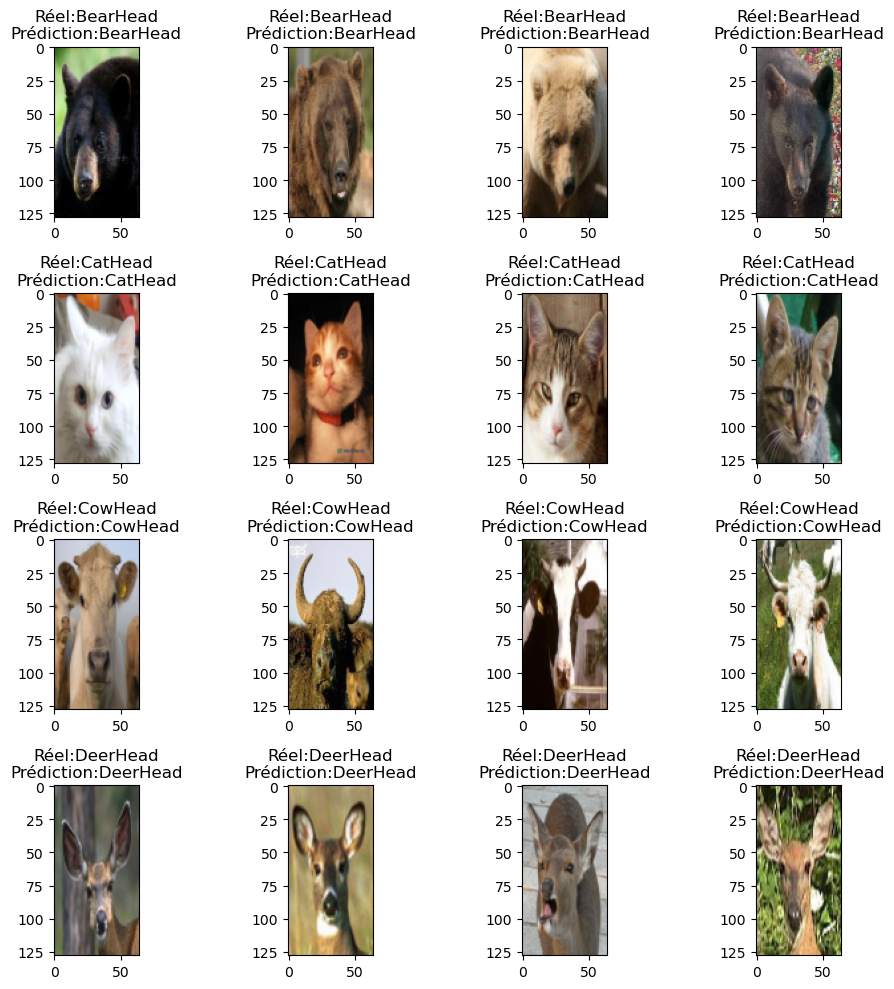

In [50]:
fig=plt.figure(figsize=(10,10))
j=0
for i in testImages:
    plt.subplot(4,4,j+1)
    plt.imshow(i['image'])
    plt.title(f"Réel:{i['name']}\nPrédiction:{i['prediction']}")
    j+=1
    
    
plt.tight_layout()